# [DF907_06]

## 6. 영상 크기 조절 (Resizing)

(1) 이미지를 컬러 이미지로 읽고 height와 width를 출력해본다.  
(2) height, width를 각각 1/2 와 2배로 resize를 진행한다.  
(3) height, width를 원하는 크기로 resize를 진행한다.  
(4) 원하는 크기로 resize시 여러가지 interpolation을 적용하여 저장한 뒤  
(5) 이미지 간의 차이를 비교해보자.

>이미지를 원하는 크기로 활용하기 위해서 크기를 조절해보고 크기를 조절하며 다양한 보간법 (interpolation)을 적용해보고 생각해본다.

힌트 : cv2.resize() 함수를 확인  
- 다양한 interpolation 기법이 있지만, 우선적으로 linear, cubic, area 세가지 기법에 대해서 공부해보고 적용해보아도 좋다.

In [3]:
# (1) 이미지를 컬러 이미지로 읽고 height와 width 출력
import cv2
import numpy as np

img = cv2.imread('DF907_01_01.jpg', 1) # mode : 1(color)
h = img.shape[0]
w = img.shape[1]
print('height :', h)
print('width :', w)

height : 225
width : 225


In [5]:
# (2) h, w를 각각 1/2와 2배로 resize
img_resized1 = cv2.resize(img, dsize = (w//2, h*2)) # dsize : 결과 이미지 크기

In [6]:
# (3) h, w를 원하는 크기로 resize
img_resized2 = cv2.resize(img, dsize = (0, 0), fx=1.4, fy=0.5)

# 결과 이미지 크기(desize)가 (0,0)으로 크기를 설정하지 않은 경우,
# fx와 fy를 이용하여 이미지의 비율을 조절할 수 있다! (fx : 너비 비율, fy : 높이 비율)

In [7]:
# (4) 원하는 크기로 resize시 여러가지 interpolation을 적용하여 저장
img_resized3 = cv2.resize(img, dsize = (0, 0), fx=1.4, fy=0.5, interpolation = cv2.INTER_LINEAR)
img_resized4 = cv2.resize(img, dsize = (0, 0), fx=1.4, fy=0.5, interpolation = cv2.INTER_CUBIC)
img_resized5 = cv2.resize(img, dsize = (0, 0), fx=1.4, fy=0.5, interpolation = cv2.INTER_AREA)

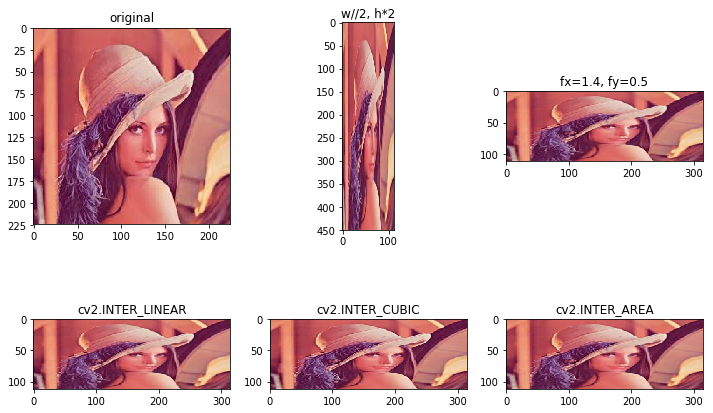

In [13]:
# (5) 표에 이미지 표시하기
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(1, figsize=(12, 8)) # w, h의 비율에 맞춰서 figsize setting
plt.subplots_adjust(wspace=0.2, hspace=0.1) # subplot 간의 간격

'''
# sol1) BGR(Opencv)를 RGB(matplotlib)로 보여주도록 swap & merge
b, g, r = cv2.split(img)   # img파일을 b,g,r로 분리
img2 = cv2.merge([r,g,b]) # b, r을 바꿔서 merge

b, g, r = cv2.split(img_R)   # img파일을 b,g,r로 분리
img_R2 = cv2.merge([r,g,b]) # b, r을 바꿔서 merge
'''
# sol2) cv2.cvtColor(img, cv2.BGR2RGB)
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_resized11 = cv2.cvtColor(img_resized1, cv2.COLOR_BGR2RGB)
img_resized22 = cv2.cvtColor(img_resized2, cv2.COLOR_BGR2RGB)
img_resized33 = cv2.cvtColor(img_resized3, cv2.COLOR_BGR2RGB)
img_resized44 = cv2.cvtColor(img_resized4, cv2.COLOR_BGR2RGB)
img_resized55 = cv2.cvtColor(img_resized5, cv2.COLOR_BGR2RGB)

plt.subplot(2,3,1)
plt.imshow(img1)
plt.title('original')

plt.subplot(2,3,2)
plt.imshow(img_resized11)
plt.title('w//2, h*2')

plt.subplot(2,3,3)
plt.imshow(img_resized22)
plt.title('fx=1.4, fy=0.5')

plt.subplot(2,3,4)
plt.imshow(img_resized33)
plt.title('cv2.INTER_LINEAR') # default

plt.subplot(2,3,5)
plt.imshow(img_resized44)
plt.title('cv2.INTER_CUBIC') # 확대 시 많이 쓰이는 보간법

plt.subplot(2,3,6)
plt.imshow(img_resized55)
plt.title('cv2.INTER_AREA') # 축소 시 많이 쓰이는 보간법

plt.show()

## [ 영상 크기 조절 (Resize) ]

### < cv2.resize(img, dsize=(w,h), interpolation=cv2.~) >
* dsize = (640, 480) 이렇게 크기를 아예 지정하거나,
* desize = (img.shape[1]* 2, img.shape[0]//2) 이렇게 shape를 이용하거나,
* desize = (0,0), fx = 0.5, fy = 1.4 이렇게 x, y의 배율을 정해줘도 됨!

### < 영상 보간 (interpolation) 속성 >
* **cv2.INTER_LINEAR** : **'쌍 선형 보간법'**, 기본적으로 **가장 많이** 사용됨 (**default!**)
* **cv2.INTER_CUBIC** : **'바이큐빅 보간법'**, 이미지를 **확대**하는 경우 많이 사용됨
* **cv2.INTER_AREA** : **'영역 보간법'**, 이미지를 **축소**하는 경우 많이 사용됨

## [ 영상 뒤집기(Flip) ]

### < cv2.flip(img, mode) >
* cv2.flip(img, 1) ==> **1이면 좌우 반전**(수평 뒤집기)
* cv2.flip(img, 0) ==> **0이면 상하 반전**(수직 뒤집기)

### <cv2.cvtColor(img, cv2.COLOR_BRG2RGB) >
* **plt**에 이미지 표시할 때 나타나는 색상 변화 문제를 해결할 수 있다! (RGB vs BGR)
* cvtColor 함수의 두 번째 인자인 **코드(cv2.COLOR_)**에 따라서 다양한 방식으로 **이미지의 색상을 변환해 저장**할 수 있다!

## [ 영상 이동(Translation) 및 회전(Rotation) ]

### < cv2.warpAffine(img, M, (col, row)) >
* cv2.warpAffine(src, 변환행렬 M, output 크기(x, y))
* **M에 따라** 다양한 기하학적 변환 가능!
    * ex. translation(이동), rotation(회전), scale(확대, 축소)  

<hr>  

#### 1.  **이동** 변환 M : **np.float32([[1, 0, tx],[0, 1, ty]])**   
    ==> tx와 ty는 각각 x축, y축 방향으로 이동 크기
#### 2.  **회전** 변환 M : **cv2.getRotationMatrix2D(center(x,y), angle, scale)**  
    ==> 회전 변환 행렬 생성 함수
>OpenCV에서 영상의 **x축**은 **width**이므로, **col**먼저!  
>cf.파이썬에서, **img.shape** : (**행, 열**, 채널수) == (**h, w**, 채널수) == (**rows, cols**, 채널수) 

> YUV와 HSV는 plot에 나타내면 색깔 다르게 나타나는 현상에 대해서... (gray는 cmap="gray"으로 해결)  
(참고 링크 : https://matplotlib.org/tutorials/introductory/images.html)  
(내 깃헙 issue : https://github.com/Jiwon-Hwang/Dafit/issues/2 : bgr to rgb)